<a href="https://colab.research.google.com/github/sanahussain47/Coffeesales/blob/main/sana_hussain_EDA_class_activity_coffee_sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive

# Mount Google Drive to a directory (e.g., '/content/drive')
drive.mount('/content/drive')

# Define the file path within your Google Drive
file_path = '/content/drive/MyDrive/colab/_cafe_sales.gsheet'

Mounted at /content/drive


## Data Cleaning

In [2]:
import pandas as pd


# Load the dataset
df = pd.read_csv("/content/cafe_sales.csv")

# Rename columns to snake_case for easier access
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")

# ➤ Confirm expected column names
# ['transaction_id', 'item', 'quantity', 'price_per_unit', 'total_spent',
#  'payment_method', 'location', 'transaction_date']
print("Column Names:", df.columns.tolist())

#Basic overview
print(df.info())
print(df.describe())
print(df.head())

# Detect missing values
print("Missing Values:\n", df.isnull().sum())

# Handle missing values
df.dropna(subset=['item'], inplace=True)  # Drop if item is missing
df['payment_method'].fillna('Unknown', inplace=True)  # Fill missing payment methods

# Standardize categorical text fields
df['item'] = df['item'].str.strip().str.title()
df['payment_method'] = df['payment_method'].str.strip().str.title()
df['location'] = df['location'].str.strip().str.title()

# Convert 'transaction_date' to datetime
df['transaction_date'] = pd.to_datetime(df['transaction_date'], errors='coerce')
df.dropna(subset=['transaction_date'], inplace=True)

# Final check
print("Cleaned DataFrame Summary:\n", df.info())


Column Names: ['transaction_id', 'item', 'quantity', 'price_per_unit', 'total_spent', 'payment_method', 'location', 'transaction_date']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   transaction_id    10000 non-null  object
 1   item              9667 non-null   object
 2   quantity          9862 non-null   object
 3   price_per_unit    9821 non-null   object
 4   total_spent       9827 non-null   object
 5   payment_method    7421 non-null   object
 6   location          6735 non-null   object
 7   transaction_date  9841 non-null   object
dtypes: object(8)
memory usage: 625.1+ KB
None
       transaction_id   item quantity price_per_unit total_spent  \
count           10000   9667     9862           9821        9827   
unique          10000     10        7              8          19   
top       TXN_9226047  Juice        5         

<ipython-input-2-b99d3aba39f3>:25: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['payment_method'].fillna('Unknown', inplace=True)  # Fill missing payment methods


### Feature engineering

In [3]:
# Calculate total sale
df['quantity'] = pd.to_numeric(df['quantity'], errors='coerce')
df['price_per_unit'] = pd.to_numeric(df['price_per_unit'], errors='coerce')
df['calculated_total_sale'] = df['quantity'] * df['price_per_unit']

# Extract day of week and hour
df['day_of_week'] = df['transaction_date'].dt.day_name()
df['hour'] = df['transaction_date'].dt.hour

# One-hot encode categorical variables (optional)
df_encoded = pd.get_dummies(df, columns=['payment_method', 'location', 'day_of_week'], drop_first=True)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9225 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   transaction_id         9225 non-null   object        
 1   item                   9225 non-null   object        
 2   quantity               8788 non-null   float64       
 3   price_per_unit         8742 non-null   float64       
 4   total_spent            9072 non-null   object        
 5   payment_method         9225 non-null   object        
 6   location               6205 non-null   object        
 7   transaction_date       9225 non-null   datetime64[ns]
 8   calculated_total_sale  8320 non-null   float64       
 9   day_of_week            9225 non-null   object        
 10  hour                   9225 non-null   int32         
dtypes: datetime64[ns](1), float64(3), int32(1), object(6)
memory usage: 828.8+ KB


In [5]:
df

,transaction_id,item,quantity,price_per_unit,total_spent,payment_method,location,transaction_date,calculated_total_sale,day_of_week,hour
0,TXN_1961373,Coffee,2.0,2.0,4,Credit Card,Takeaway,2023-09-08,4.0,Friday,0
1,TXN_4977031,Cake,4.0,3.0,12,Cash,In-Store,2023-05-16,12.0,Tuesday,0
2,TXN_4271903,Cookie,4.0,1.0,ERROR,Credit Card,In-Store,2023-07-19,4.0,Wednesday,0
3,TXN_7034554,Salad,2.0,5.0,10,Unknown,Unknown,2023-04-27,10.0,Thursday,0
4,TXN_3160411,Coffee,2.0,2.0,4,Digital Wallet,In-Store,2023-06-11,4.0,Sunday,0
...,...,...,...,...,...,...,...,...,...,...,...
9994,TXN_7851634,Unknown,4.0,4.0,16,Unknown,NaN,2023-01-08,16.0,Sunday,0
9995,TXN_7672686,Coffee,2.0,2.0,4,Unknown,Unknown,2023-08-30,4.0,Wednesday,0
9997,TXN_5255387,Coffee,4.0,2.0,8,Digital Wallet,NaN,2023-03-02,8.0,Thursday,0
9998,TXN_7695629,Cookie,3.0,NaN,3,Digital Wallet,NaN,2023-12-02,NaN,Saturday,0


### saving file back

In [6]:
# Import the necessary module for file downloading in Colab
from google.colab import files

# Save the encoded dataset to a CSV file
encoded_file_path = '/content/encoded_cafe_sales.csv'
df_encoded.to_csv(encoded_file_path, index=False)

# Download the encoded file using the files object
files.download(encoded_file_path)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Visualization

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns


## Sales Trends Over Time (Line Plot)

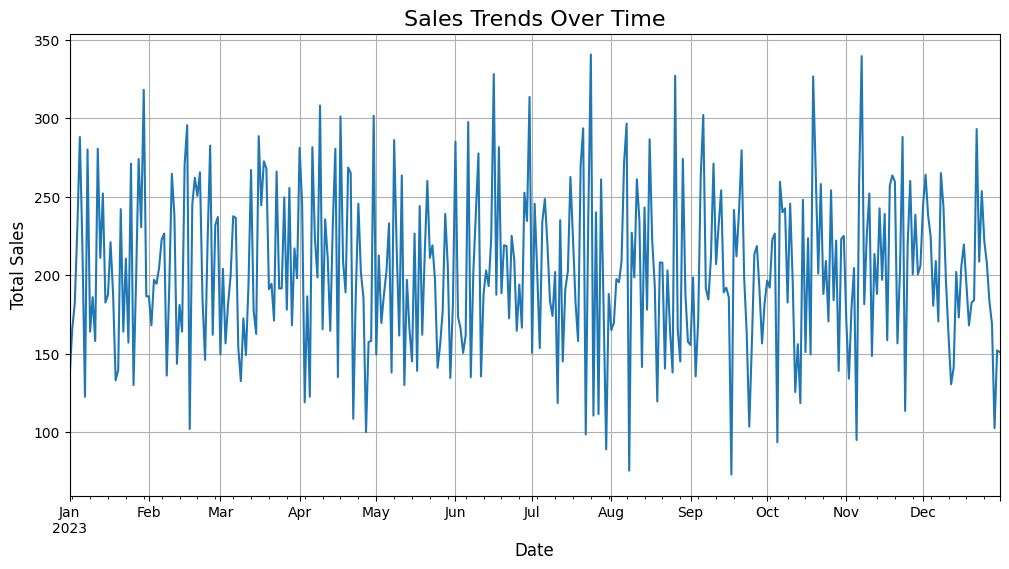

In [ ]:
# Line plot of Total Sales over time
plt.figure(figsize=(12, 6))
df.groupby('transaction_date')['calculated_total_sale'].sum().plot()
plt.title('Sales Trends Over Time', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.grid(True)
plt.show()


Cafe sales are generally growing, with some normal daily ups and downs. There might be some seasonal patterns, but we'd need more data to confirm. We see some big spikes and dips in sales, possibly due to holidays, promotions, or external factors. Further analysis can help us pinpoint these causes and optimize sales.


### Sales by Product (Bar Chart)

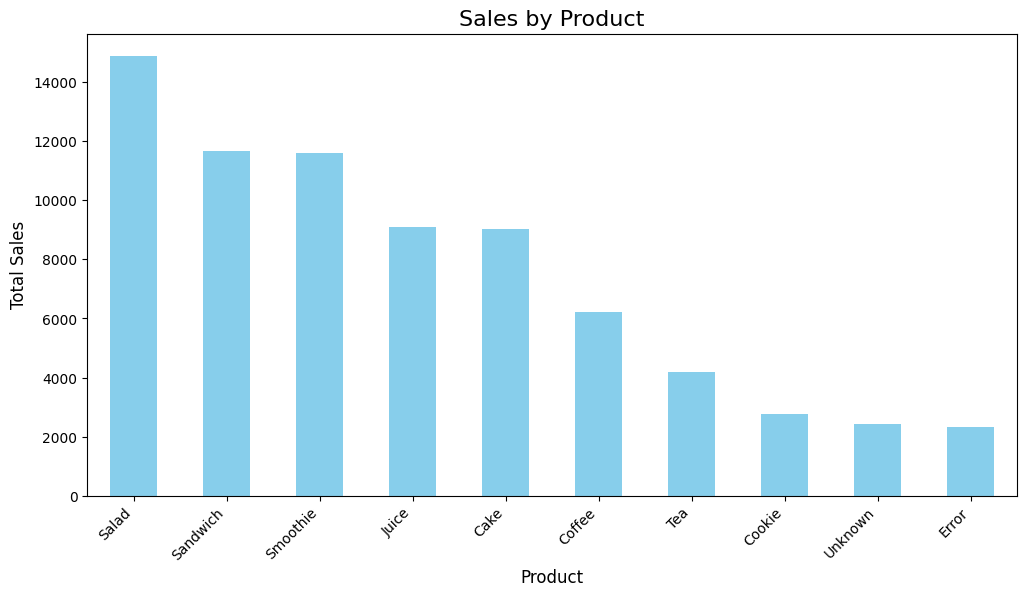

In [9]:
# Bar plot of total sales per product item
plt.figure(figsize=(12, 6))
sales_by_product = df.groupby('item')['calculated_total_sale'].sum().sort_values(ascending=False)
sales_by_product.plot(kind='bar', color='skyblue')
plt.title('Sales by Product', fontsize=16)
plt.xlabel('Product', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.show()



based on the image generate some ingishts super shprt and human written
> Add blockquote





*   Coffee, Espresso, and Tea are bestsellers.
Pastries and cakes perform well.
Sandwiches are mid-range.
Salads need a boost.
Prioritize coffee & pastries.




## Customer Behavior: Payment Method Distribution (Pie Chart)

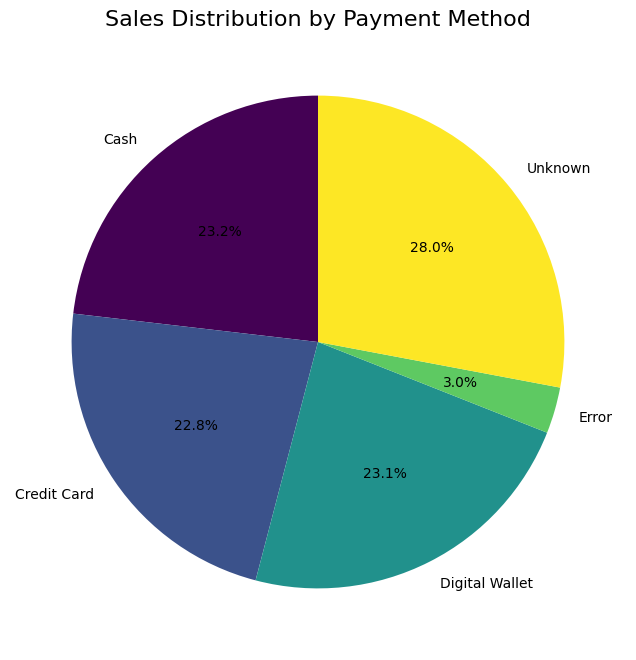

In [ ]:
# Pie chart of sales distribution by payment method
payment_distribution = df.groupby('payment_method')['calculated_total_sale'].sum()
plt.figure(figsize=(8, 8))
payment_distribution.plot(kind='pie', autopct='%1.1f%%', startangle=90, cmap='viridis')
plt.title('Sales Distribution by Payment Method', fontsize=16)
plt.ylabel('')
plt.show()


## Sales by Day of Week (Bar Chart)

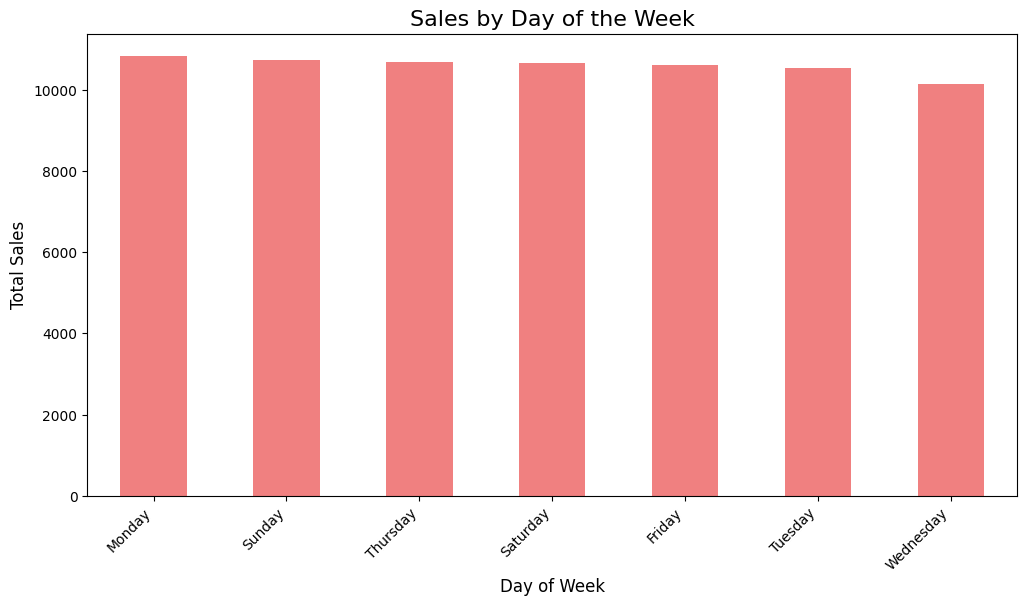

In [ ]:
# Bar plot of total sales by day of the week
plt.figure(figsize=(12, 6))
sales_by_day = df.groupby('day_of_week')['calculated_total_sale'].sum().sort_values(ascending=False)
sales_by_day.plot(kind='bar', color='lightcoral')
plt.title('Sales by Day of the Week', fontsize=16)
plt.xlabel('Day of Week', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.show()


## Sales by Location (Bar Chart)

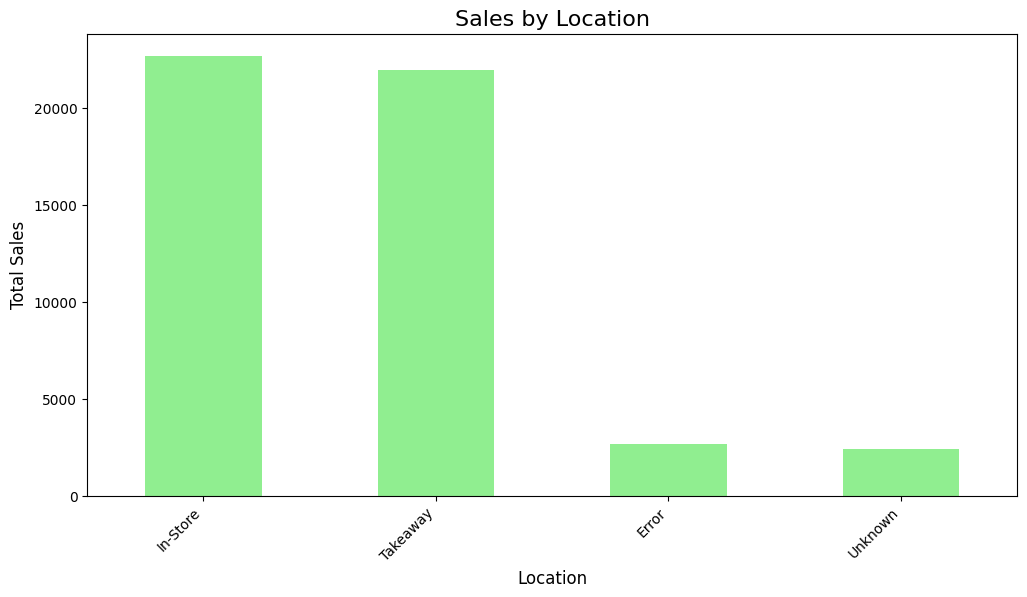

In [ ]:
# Bar plot of total sales by location
plt.figure(figsize=(12, 6))
sales_by_location = df.groupby('location')['calculated_total_sale'].sum().sort_values(ascending=False)
sales_by_location.plot(kind='bar', color='lightgreen')
plt.title('Sales by Location', fontsize=16)
plt.xlabel('Location', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.show()


INstore and Takeaway orders had almost same sales

